In [36]:
#import files
import pandas as pd
import numpy as dragon
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [30]:
#prepare the data
data=pd.read_csv('../dataset/iron_oilmonthly.csv',parse_dates=['date'])
data=data.dropna()
df=data[['oildata','date']]
df=df.set_index('date')
df=df.dropna()
#train,test=df[:98],df[98:]

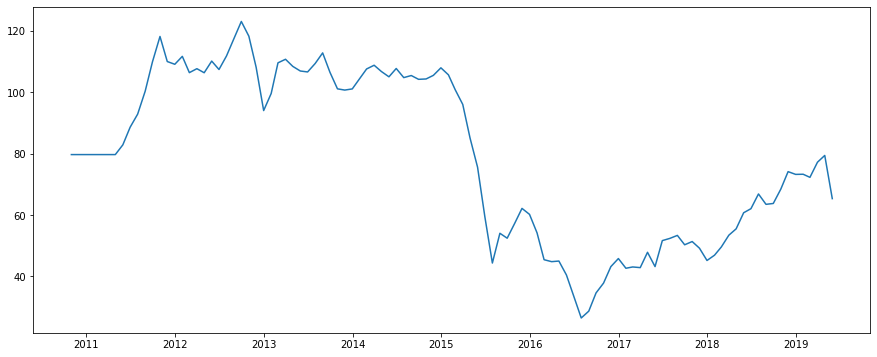

In [31]:
plt.plot(df)

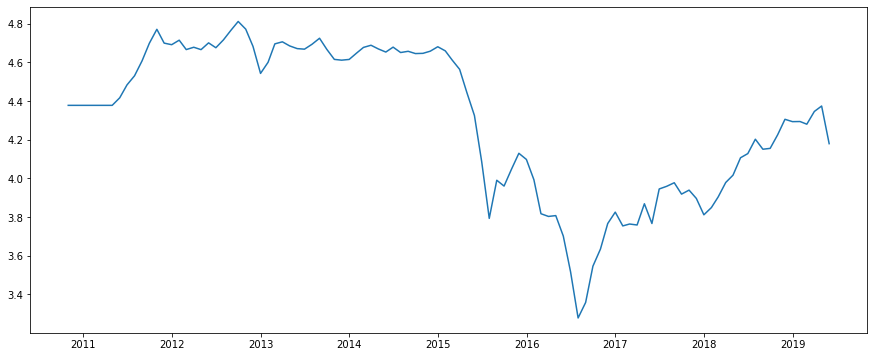

In [32]:
df_log = np.log(df)
plt.plot(df_log)

In [33]:
print(len(df))
print(len(df_log))
df_log.head()

104
104


,oildata
date,
2010-10-31,4.377793
2010-11-30,4.377793
2010-12-31,4.377793
2011-01-31,4.377793
2011-02-28,4.377793


In [34]:
from statsmodels.tsa.arima_model import ARIMA
#size = int(len(ts_log)-100)
#train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
train_arima,test_arima = df_log[:98].oildata,df_log[98:].oildata
history = [x for x in train_arima]

predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit(disp=0)
    
    output = model_fit.forecast()
    print("output = ",output[0])
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    print("original_first", original_value)
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    print("orginal second", original_value)
    
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
    #error = mean_squared_error(dragon.exp(yhat), dragon.exp(obs))
    #print('mean_squared_error : ', error)
print('\n Means Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

Printing Predicted vs Expected Values...


output =  [4.32920762]
original_first 4.293475111221884
orginal second 73.22047618999997
predicted = 75.884133,   expected = 73.220476,   error = 3.637858  %
output =  [4.28946627]
original_first 4.294101617351093
orginal second 73.26636364000002
predicted = 72.927534,   expected = 73.266364,   error = 0.462462  %
output =  [4.29366704]
original_first 4.2802346234901805
orginal second 72.25739130000002
predicted = 73.234530,   expected = 72.257391,   error = 1.352303  %
output =  [4.27546336]
original_first 4.346127399300993
orginal second 77.17899999999997
predicted = 71.913453,   expected = 77.179000,   error = 6.822512  %
output =  [4.36520563]
original_first 4.37433407919163
orginal second 79.38695651999998
predicted = 78.665574,   expected = 79.386957,   error = 0.908691  %
output =  [4.38278821]
original_first 4.179486136706149
orginal second 65.33227273
predicted = 80.060949,   expected = 65.332273,   error = 22.544259  %

 Means Error 

C:\Users\sumon\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [24]:
test_arima.oildata

date
2018-12-31    4.293475
2019-01-31    4.294102
2019-02-28    4.280235
2019-03-31    4.346127
2019-04-30    4.374334
2019-05-31    4.179486
Name: oildata, dtype: float64

In [35]:
df[98:]

,oildata
date,
2018-12-31,73.220476
2019-01-31,73.266364
2019-02-28,72.257391
2019-03-31,77.179000
2019-04-30,79.386957
2019-05-31,65.332273
